# Intertemporal Choice: Problem Set 2

Matt Zahn

September 20, 2018

In [1]:
# Some initial setup

import sys 
import os
sys.path.insert(0, os.path.abspath('../lib'))


from matplotlib import pyplot as plt
import numpy as np
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')
from copy  import deepcopy

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Problem 1) Population Growth and Dynamic Inefficiency in the OLG Model

Consider a Diamond (1965) OLG economy similar to the one in the OLGModel handout with logarithmic utility and a Cobb-Douglas aggregate production. Note that population growth is not necessarily constant.

### Part a) 

Under the given conditions, the per-young-capita aggregate production function is:

$$f(k_t) \equiv F(K_t, L_t) / L_t = F(K_t/L_t, 1)$$

Note that we are assuming the following population dynamics: $L_{t+1} = \Xi_{t+1}L_t$ where $\Xi \equiv (1 + \xi)$. Note $L_{t} = \Xi_{t}L_{t-1}$.

As the OLG model assumes perfect competition, which produces wages and net interest rates equal to the marginal products of labor and capital:

$$W_t = f(k_t) - k_tf'(k_t)$$

$$r_t = f'(k_t)$$

The aggregate production function takes the following Cobb-Douglas form: $F(K,L) = K^{\epsilon}L^{1 - \epsilon} \Rightarrow f(k) = k^{\epsilon}$. Under this assumption, wages and interest rates take the following forms:

$$W_t = (1 - \epsilon) k^{\epsilon}_t$$

$$r = \epsilon k^{\epsilon - 1}_t$$

Further, as we are assuming logarithmic demand, a consumer's consumption in period $t$ will be:

$$c_{1,t} \frac{W_{1,t} + W_{2,t+1} / R_{t+1}}{1 + \beta}$$

In the OLG model all income is earned in the first period of life. Thus a consumer’s consumption in period $t$ becomes:

$$c_{1,t} \frac{W_{1,t}}{1 + \beta}$$

The assets that a young consumer has at the end of the first period can be expressed as the difference between their wage and what they consumed in that period. Formally:

$$a_{1,t} = W_{1,t} - c_{1,t}$$

$$= W_{1,t}(1-\frac{1}{1+ \beta})$$

$$= W_{1,t}(\frac{\beta}{1+ \beta})$$

$$= (1 - \epsilon) k^{\epsilon}_t(\frac{\beta}{1+ \beta})$$

$$a_{1,t} = k^{\epsilon}_t(\frac{(1 - \epsilon)\beta}{1+ \beta})$$

The per-young-capita aggregate function implies:

$$k_t = \frac{a_{1,t-1}}{\Xi_t} \Rightarrow k_{t+1} = \frac{a_{1,t}}{\Xi_{t+1}}$$

Thus, we can define the evolution of capital per worker in the economy from period $t$ to $t+1$ as:

$$k_{t+1} = \frac{a_{1,t}}{\Xi_{t+1}}$$

$$k_{t+1} = \frac{k^{\epsilon}_t(\frac{(1 - \epsilon)\beta}{1+ \beta})}{\Xi_{t+1}}$$

$$k_{t+1} = k^{\epsilon}_t \frac{(1 - \epsilon)\beta}{\Xi_{t+1}(1 + \beta)}$$

### Part b)

Assuming that the rate of population growth is constant at $\Xi_t = \Xi$  $\forall t$, the steady-state level of $k_t$ the economy achieves is as follows. Note that the steady state is defined as the point where $k_{t+1} = k_t = \bar{k}$. Thus we can rewrite the solution to Part a) and derive the steady state level of $k_t$.

$$k_{t+1} = k^{\epsilon}_t \frac{(1 - \epsilon)\beta}{\Xi_{t+1}(1 + \beta)}$$

$$\bar{k} = \bar{k^{\epsilon}} \frac{(1 - \epsilon)\beta}{\Xi(1 + \beta)}$$

$$\bar{k} = \left(\frac{(1 - \epsilon)\beta}{\Xi(1 + \beta)}\right)^{\frac{1}{1-\epsilon}}$$

Now suppose that that the economy has been growing by a constant factor of $\Xi$ since the beginning of time. Beginning at period $t$ the population will grow at a faster rate than before: $\hat{\Xi} > \Xi$.

### Part c)

The new steady-state level of capital stock per capita associated with $\hat{\Xi}$ is smaller than before. From the solution to Part b), we can see that $\Xi$ is in the denominator of $\hat{k}$. Since $\hat{\Xi} > \Xi$ the denominator will be greater, which will decrease the value of $\bar{k}$. Intuitively as $\Xi$ gets larger, the size of the population grows. Assuming that the amount of capital in the economy remains constant, this means that there will be less capital available per person in the steady state than was previously available.  

### Part d) 

In the OLG model, each period $t$ corresponds to 30 years, which means each generation lives for a total of 60 years. Assume that the time preference factor per year is 0.96 or $\beta = 0.96^{30}$ per generation $t$ and $\alpha = 0.33$. For convenience, restrict the range of $k_t$ and $k_{t+1}$ between 0 and 0.05.

In [28]:
# Set up given parameters
t_years = 30
disc_fact = 0.96
epsilon = 0.33
k_max = 0.05

#### d.i) 

Suppose the population growth rate per year is 1.01 or $\Xi = 1.01^{30}$. Draw a diagram to show the $k_{t+1}(k_t)$ curve. Indicate the steady state level of $k_t$ and call it $k_0$. 

In [32]:
# Set additional given parameters
pop_growth = 1.01

# Define some parameters
beta = disc_fact**t_years
xi = pop_growth**t_years
q = (1-epsilon)*(beta/(1+beta))/xi
k_bar = q**(1/(1-epsilon))

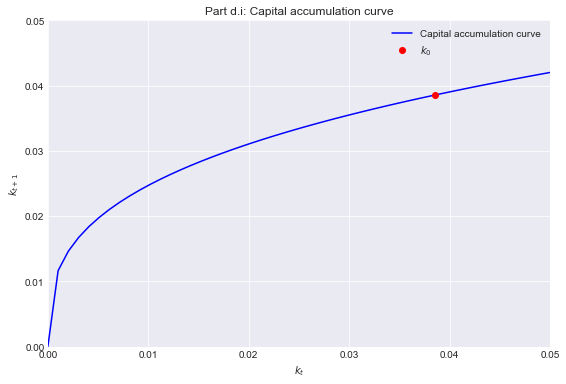

In [39]:
# Plot the OLG capital accumulation curve and 45 deg line
plt.figure(figsize=(9,6))
kt_range = np.linspace(0, k_max)
    
ktp1 = q*kt_range**epsilon
plt.plot(kt_range, ktp1, 'b-', label = 'Capital accumulation curve')

# Plot k_bar
plt.plot(k_bar, k_bar, 'ro', label = '$k_0$')
    
plt.legend()
plt.xlim(0 ,k_max)
plt.ylim(0, k_max)
plt.title("Part d.i: Capital accumulation curve")
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.show()

#### d.ii) 

Suppose the population growth rate per year is 1.03 or $\Xi = 1.03^{30}$. Draw a diagram to show the $k_{t+1}(k_t)$ curve using a new color. Indicate the steady state level of $k_t$ and call it $k_1$. 

In [44]:
# Set additional given parameters
pop_growth = 1.03

# Define some parameters
beta = disc_fact**t_years
xi = pop_growth**t_years
q = (1-epsilon)*(beta/(1+beta))/xi
k_bar = q**(1/(1-epsilon))

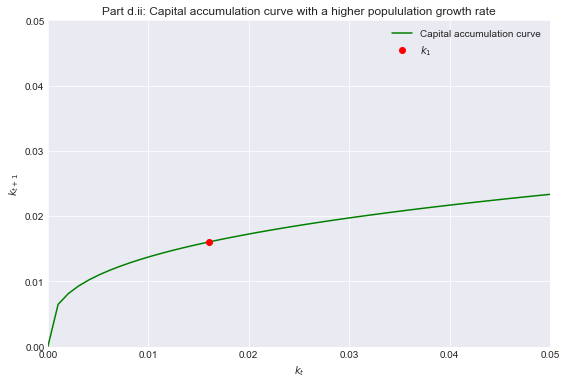

In [45]:
# Plot the OLG capital accumulation curve
plt.figure(figsize=(9,6))
kt_range = np.linspace(0, k_max)
    
ktp1 = q*kt_range**epsilon
plt.plot(kt_range, ktp1, 'g-', label = 'Capital accumulation curve')

# Plot k_bar
plt.plot(k_bar, k_bar, 'ro', label = '$k_1$')
    
plt.legend()
plt.xlim(0 ,k_max)
plt.ylim(0, k_max)
plt.title("Part d.ii: Capital accumulation curve with a higher popululation growth rate")
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.show()

#### d.iii) 

Now draw a 45 degree line. Show the dynamic adjustment process for the capital stock from its old steady-state at $k_0$ toward its new steady-state at $k_1$. 

The graph below supports my initial answer. We see that the higher population growth rate leads to an overall lower level of capital accumulation per capita. Further, the steady state moves from $k_0$ to $k_1$ which is also at a lower level of capital stock per capita. 

In [47]:
# Set additional given parameters
pop_growth_i = 1.01
pop_growth_ii = 1.03

# Define some parameters
beta = disc_fact**t_years
xi_i = pop_growth_i**t_years
xi_ii = pop_growth_ii**t_years
q_i = (1-epsilon)*(beta/(1+beta))/xi_i
q_ii = (1-epsilon)*(beta/(1+beta))/xi_ii
k_bar_i = q_i**(1/(1-epsilon))
k_bar_ii = q_ii**(1/(1-epsilon))

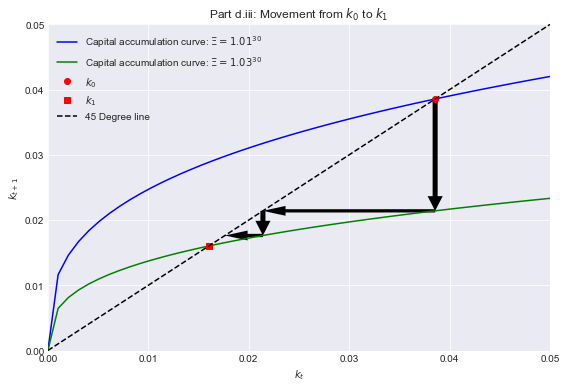

In [58]:
# Plot the OLG capital accumulation curve
plt.figure(figsize=(9,6))
kt_range = np.linspace(0, k_max)
    
ktp1_i = q_i*kt_range**epsilon
ktp1_ii = q_ii*kt_range**epsilon
plt.plot(kt_range, ktp1_i, 'b-', label = 'Capital accumulation curve: $\Xi = 1.01^{30}$')
plt.plot(kt_range, ktp1_ii, 'g-', label = 'Capital accumulation curve: $\Xi = 1.03^{30}$')

# Plot k_bars
plt.plot(k_bar_i, k_bar_i, 'ro', label = '$k_0$')
plt.plot(k_bar_ii, k_bar_ii, 'rs', label = '$k_1$')

# Add 45 degree line
plt.plot(kt_range, kt_range, 'k--', label='45 Degree line')

    # Plot the path
kt_ar = k_bar_i
ktp1_ar = k_bar_i
for i in range(2):
    plt.arrow(kt_ar, ktp1_ar, 0., q*kt_ar**epsilon-ktp1_ar,
        length_includes_head=True,
        lw=0.01,
        width=0.0005,
        color='black',
        edgecolor=None)
    plt.arrow(kt_ar, q*kt_ar**epsilon, q*kt_ar**epsilon-kt_ar , 0.,
        length_includes_head=True,
        lw=0.01,
        width=0.0005,
        color='black',
        edgecolor=None)
    kt_ar = q*kt_ar**epsilon
    ktp1_ar = kt_ar
    i = i+1  

plt.legend()
plt.xlim(0 ,k_max)
plt.ylim(0, k_max)
plt.title("Part d.iii: Movement from $k_0$ to $k_1$")
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.show()

### Part e)

An index of aggregate consumption per person in period $t$ is given by: 

$$\chi_t = c_{1,t} + \frac{c_{2,t}}{\Xi}$$

It is clear to see why this is an appropriate measure of aggregate consumption per person by looking at the economy's aggregate resource constraint:

$$Sources = Uses$$

$$K_t + F(K_t, L_t) = K_{t+1} + L_t c_{1,t} + L_{t-1} c_{2,t}$$

Thus by dividing by the current population in the current period, $L_t$ we get:

$$K_t + F(K_t, L_t) = K_{t+1} + L_t c_{1,t} + L_{t-1} c_{2,t}$$

$$(L_{t-1} a_{1,t-1}) + F(K_t, L_t) = (L_t a_{1,t}) + L_t c_{1,t} + L_{t-1} c_{2,t}$$

$$(L_{t-1} a_{1,t-1}) + F(K_t, L_t) = (L_{t-1} \Xi a_{1,t}) + (L_{t-1} \Xi) c_{1,t} + L_{t-1} c_{2,t}$$

$$\frac{(L_{t-1} a_{1,t-1})}{L_{t-1} \Xi} + F(\frac{(L_{t-1} a_{1,t-1})}{L_{t-1} \Xi}, L_t/L_t) = \frac{(L_{t-1} \Xi a_{1,t})}{L_{t-1} \Xi} + \frac{(L_{t-1} \Xi) c_{1,t}}{L_{t-1} \Xi} + \frac{L_{t-1} c_{2,t}}{L_{t-1} \Xi}$$

$$\frac{a_{1,t-1}}{\Xi} + F(\frac{a_{1,t-1}}{\Xi}, 1) = a_{1,t} + c_{1,t} + \frac{c_{2,t}}{\Xi}$$

$$k_t + f(k_t) = a_{1,t} + c_{1,t} + \frac{c_{2,t}}{\Xi}$$

$$k_t + f(k_t) = a_{1,t} + \chi_t$$

This equation represents the dynamic budget constraint for at the per capita level, relating each consumers sources of capital and their uses. We can see that our index of consumption $\chi_t$ is a component of this equation. Thus we have shown that it is an apporpriately defined index of per person consumption in a given period $t$. From here, we can define a formula that shows the sustainable level of $\chi$ associated with a given level of $k_t$. Recall from earlier: $k_{t+1} = \frac{a_{1,t}}{\Xi} \Rightarrow k_{t+1} \Xi = a_{1,t}$. At the steady state $k_{t+1} = k_t = \bar{k}$.

$$k_t + f(k_t) = a_{1,t} + \chi_t$$

$$\bar{k} + f(\bar{k}) = \bar{k} \Xi + \chi_t$$

$$f(\bar{k}) + \bar{k} - \bar{k} \Xi = \chi_t$$

$$f(\bar{k}) +\bar{k}(1 - \Xi) = \chi_t$$

$$f(\bar{k}) - \xi\bar{k} = \chi_t$$

### Part f)

From the solution to Part e) we have the steady state level of consumption. 

$$f(\bar{k}) - \xi\bar{k} = \chi_t$$

To determine how a marginal change in the population growth rate effects steady state level consumption, we can take the derivative of this term:

$$\bar{\chi_t} = \frac{\partial f(\bar{k})}{\partial \bar{k}} \frac{d \bar{k}}{d \xi} - \xi \frac{d \bar{k}}{d \xi} - \bar{k}$$

$$\bar{\chi_t} = \left(\frac{\partial f(\bar{k})}{\partial \bar{k}} - \xi \right) \frac{d \bar{k}}{d \xi}- \bar{k}$$

$$\bar{\chi_t} = \left(\bar{r} - \xi \right) \frac{d \bar{k}}{d \xi} - \bar{k}$$

If the economy is in a substantial state of dynamic inefficiency at the steady state, then the term $\bar{r} - \xi$ will be positive. We have previously shown that that as $\xi$ increases the level of $\bar{k}$ decreases. Thus we can conclude that $\frac{d \bar{k}}{d \xi}$ is negative. Under these conditions, an increase in the populate growth rate will never lead to an increase in the steady state level of consumption.  

## Problem 2: Social Security and the Baby Boom

Consider a society where a generation born at time period $t$ that is substantially larger than generations born before it and will be born after it. Formally:

$$L_t >> L_{t'}$$ 
$$ t' \ne t$$

We can utilize a generational accounting framework to determine the effect of this larger "baby boom" generation  LtLt  has on a Pay As You Go (PAYGO) social security system. First, we will consider a system that keeps per-capita benefits constant across generations. Then we will compare that to a system that keeps per-capita taxes constant across generations.

Under a system where social security benefits are held constant across generations the amount of income that will be taken from the young at a given time period will scale based on the size of the old generation at that time period. In the context of this problem, when the baby boom generation is young they will likely pay a lower amount into the social security system per-capita than the old generation at that time period had to pay when they were young. This is likely the case because the baby boom generation is substantially larger than all other generations. When the baby boom generation becomes old and starts collecting social security benefits there will be more beneficiaries than ever before. The new young generation at this time period will have to pay more per-capita in order to provide the constant benefit to more people than ever before. As a result, the baby boomer generation will have received more in social security benefits than they paid into the program. Conversely, the young generation that paid for the baby boomer's social security benefits will collect less in the form of benefits than what they paid into the program. This is due to the level of benefits being held constant, which caused them to pay more to provide the larger baby boomer generation a constant benefit.

An alternative social security system is where benefits are determined by a constant taxes across generations. Since there is no wage growth, the amount that each person will pay into social security will be approximately the same across generations. When the baby boomer generation is young, they will generate more social security benefits for the old at that time, given the large size of the baby boomer generation. As a result, the old generation at this time period will collect more in social security benefits than what they paid when they were young. When the baby boomers become the old generation, they will receive less in social security benefits than what they paid. This is because the young generation at this time is smaller and will generate a lower amount of benefits through constant taxes than what the baby boomer generation raised. 

These two structures show that it is difficult to construct a purely fair social security system. Different elements of each system will create instances where a given generation may pay more into social security than they collect or vice versa. The table below summarizes how different genrations are impacted by each of these PAYGO systems. 

| Generation | Fixed benefits | Fixed Taxes |
| --- | --- | --- |
| Earlier generations | Unaffected | Unaffected |
| $L_{t-1}$ | Unaffected | Benefit. Less taxes. More benefits. |
| "Baby boomers" $L_t$ | Benefit. Less taxes. More benefits. | Harmed. More taxes. Less benefits. |
| $L_{t+1}$ | Harmed. More taxes. Less benefits. | Unaffected |
| Later generations | Unaffected | Unaffected |